## Stroke Data Analysis
#### Predict whether a patient is likely to get a stroke based on parameters like gender, age, various diseases, and smoking status

## 1. 데이터 불러오기



In [1]:
# 구글 드라이브를 마운트하기 위한 모듈
from google.colab import drive

# 구글 드라이브를 코랩 환경에 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기

# 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_columns', None)
# 결과물로 보여주는 행 갯수 최대화
pd.set_option('display.max_rows', None)

# 데이터파일을 불러와서 데이터프레임(df)에 저장
df = pd.read_csv('/content/drive/MyDrive/data-analysis/data-csv/healthcare-dataset-stroke-data.csv')

In [3]:
# 데이터프레임의 처음 3개 행 출력
df.head(3)

# 데이터프레임의 마지막 3개 행 출력
df.tail(3)

# 데이터프레임의 행과 열의 수 확인
df.shape

# 데이터프레임의 행 수만 출력
df.shape[0]

# 데이터프레임의 각 열에 대한 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 2. ID 변수 설정


▶Python

1.   ID 변수 데이터 타입 확인
2.   결측값 확인 - 데이터의 완전성을 검사
3.   중복 여부 확인
4.   숫자가 아닌 값 확인 - 데이터의 일관성을 검사

▶Orange3

  `Feature Statistics` 위젯을 통해 변수 결측값 확인

<br/>

#### ✅ `errors='coerce'`  :  숫자로 변환할 수 없는 값이 발견되면 해당 값을 NaN으로 대체

> 즉, 이 코드는 'id' 열의 값을 숫자로 변환하되, 변환이 불가능한 값은 NaN으로 처리
>
> 이렇게 함으로써 'id' 열에서 숫자가 아닌 값이 있는지 쉽게 확인

In [4]:
# ID 변수 'id'의 데이터 타입 확인
id_dtype = df['id'].dtypes

# ID 변수 'id'의 결측값 개수 확인
id_missing = df['id'].isnull().sum()

# ID 변수 'id'의 중복되지 않은(unique) 값 개수 확인
n_unique_ids = len(pd.unique(df['id']))

# ID 변수 'id'에서 숫자가 아닌 값 개수 확인
non_numeric_ids = pd.to_numeric(df['id'], errors='coerce').isna().sum()

print("ID 변수 'id'의 데이터 타입:", id_dtype)
print("ID 변수 'id'의 결측값 개수:", id_missing)
print("ID 변수 'id'의 중복되지 않은(unique) 값 개수:", n_unique_ids)
print("ID 변수 'id'에서 숫자가 아닌 값 개수:", non_numeric_ids)

ID 변수 'id'의 데이터 타입: int64
ID 변수 'id'의 결측값 개수: 0
ID 변수 'id'의 중복되지 않은(unique) 값 개수: 5110
ID 변수 'id'에서 숫자가 아닌 값 개수: 0


## 4. 타겟 변수 설정

▶Python

1.   타겟 변수 데이터 타입 확인
2.   결측값 확인
3.   타켓변수 클래스(0/1) 개수 & 비율 확인

▶Orange3

<image src="https://github.com/silverpoodle/TIL/assets/88484476/ecb26365-3cfe-4e25-9ec8-76ac69df6205" width="400"/>

<br/><br/>


#### ✅ `dropna=False`  :  데이터에서 결측값(NaN)을 제외하지 않고 각 값의 개수를 계산

#### ✅ `normalize=True`  :  각 값의 개수를 전체 데이터의 개수로 나눈 상대적 비율을 계산



In [5]:
# 'stroke' 변수의 데이터 타입 출력
stroke_dtype = df['stroke'].dtype

# 'stroke' 변수의 결측값 개수 출력
stroke_missing = df['stroke'].isnull().sum()

# 'stroke' 변수의 각 값의 개수 출력 (결측값 포함)
stroke_value_counts = df['stroke'].value_counts(dropna=False)

# 'stroke' 변수의 각 값의 상대적 비율 출력 (결측값 포함)
stroke_value_counts_normalized = df['stroke'].value_counts(dropna=False, normalize=True)

print("Stroke 변수의 데이터 타입:", stroke_dtype)
print("Stroke 변수의 결측값 개수:", stroke_missing)
print("Stroke 변수의 각 값의 개수 (결측값 포함):", stroke_value_counts)
print("Stroke 변수의 각 값의 상대적 비율 (결측값 포함):", stroke_value_counts_normalized)

Stroke 변수의 데이터 타입: int64
Stroke 변수의 결측값 개수: 0
Stroke 변수의 각 값의 개수 (결측값 포함): stroke
0    4861
1     249
Name: count, dtype: int64
Stroke 변수의 각 값의 상대적 비율 (결측값 포함): stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


## 5. 기타 변수 데이터 처리


▶Orange3

<image src="https://github.com/silverpoodle/TIL/assets/88484476/4c6eeae3-ab54-4c09-8add-93700bd42fde" width="400"/>


<br/>

#### ✅ `errors='coerce'`  :  숫자로 변환할 수 없는 값이 발견되면 해당 값을 NaN으로 대체

> 즉, 이 코드는 'id' 열의 값을 숫자로 변환하되, 변환이 불가능한 값은 NaN으로 처리
>
> 이렇게 함으로써 'id' 열에서 숫자가 아닌 값이 있는지 쉽게 확인

In [6]:
# 구간 변수를 cols에 저장
cols = ['age', 'avg_glucose_level', 'bmi']

# cols에 해당하는 변수들의 데이터 타입 출력
print(df[cols].dtypes)

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object


In [7]:
# 소수점 2자리로 숫자 표기 제한
pd.options.display.float_format = '{:.2f}'.format

# cols에 해당하는 변수들의 기술통계(descriptive statistics) 출력
print(df[cols].describe())

          age  avg_glucose_level     bmi
count 5110.00            5110.00 4909.00
mean    43.23             106.15   28.89
std     22.61              45.28    7.85
min      0.08              55.12   10.30
25%     25.00              77.25   23.50
50%     45.00              91.88   28.10
75%     61.00             114.09   33.10
max     82.00             271.74   97.60


In [8]:
# c는 기준(criterion)의 약자
c = df['age'] > 18

# c를 만족하는 행 출력
print(df[c].head(3))

# df에 대비해서 df[c]의 자료 개수(행 기준) 비율 출력
print(len(df[c]) / len(df))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male 67.00             0              1          Yes   
1  51676  Female 61.00             0              0          Yes   
2  31112    Male 80.00             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69 36.60  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92 32.50     never smoked   

   stroke  
0       1  
1       1  
2       1  
0.8207436399217222


In [9]:
# 데이터프레임 df[c]를 df1에 저장
df1 = df[c]

# df1의 행과 열의 수 출력
print(df1.shape)

(4194, 12)


In [10]:
# Residence_type 변수명을 소문자로 시작하게 변경
df1 = df1.rename(columns={'Residence_type': 'residence_type'})

# 범주형 변수를 cols1에 저장
cols1 = ['gender', 'hypertension', 'heart_disease', 'ever_married',
         'work_type', 'residence_type', 'smoking_status']

# cols1에 해당하는 변수들의 결측값 개수 출력
print(df1[cols1].isnull().sum())

# cols1에 해당하는 변수들의 데이터 타입 출력
print(df1[cols1].dtypes)

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
residence_type    0
smoking_status    0
dtype: int64
gender            object
hypertension       int64
heart_disease      int64
ever_married      object
work_type         object
residence_type    object
smoking_status    object
dtype: object


## 6. 결측값 50% 초과 변수 제거

<image src="https://github.com/silverpoodle/TIL/assets/88484476//48443851-ce94-4059-8995-6fba3fa1f0de" width="400"/>


▶Orange3

<image src="https://github.com/silverpoodle/TIL/assets/88484476//d2ffceed-e068-48b1-9280-dd26feb895dc" width="700"/>

<br/>


#### ✅ `isna()`  :  데이터프레임의 각 셀에 대해 결측값인지 여부를 True 또는 False로 표시한 데이터프레임을 생성

#### ✅ `.any()`  :  각 열(변수)에 대해 하나라도 True(즉, 결측값이 있는)가 있는지 여부를 확인. 그 결과 각 열에 대해 True 또는 False를 반환하는 시리즈(Series)를 생성

#### ✅ `[lambda x: x]`  :   람다(lambda) 함수를 사용하여 인덱싱을 수행. (여기서 x는 열의 이름) 따라서 이 람다 함수는 열의 이름을 그대로 반환, 그 결과로 결측값을 포함한 열의 이름만을 포함하는 시리즈(Series)가 생성

#### ✅ `isnull()`  :  각 요소가 결측값인지 여부를 판단하여 불리언(boolean) 데이터프레임 또는 시리즈를 반환. 결측값이면 True를, 결측값이 아니면 False를 반환

#### ✅ `mean()`  :   비율을 계산

In [11]:
# 결측값을 갖고 있는 변수명(컬럼명) 찾기
columns_with_missing_values = df1.isna().any()[lambda x: x]

print(columns_with_missing_values)

# bmi 변수의 결측값 비율 확인
bmi_missing_ratio = df['bmi'].isnull().mean()

print("bmi 변수의 결측값 비율:", bmi_missing_ratio)

bmi    True
dtype: bool
bmi 변수의 결측값 비율: 0.03933463796477495


## 7. 요약통계 & 도수분포표 검토


▶Orange3

- 도수분포표

<image src="https://github.com/silverpoodle/TIL/assets/88484476/ebf7ccc2-cf77-4755-84db-a54f604278b4" width="700"/>


<br/>


In [12]:
# 구간 변수를 cols에 저장
cols = ['age', 'avg_glucose_level', 'bmi']

# 구간(interval) 변수의 요약통계 구하기
df1[cols].describe()

,age,avg_glucose_level,bmi
count,4194.00,4194.00,4014.00
mean,50.66,108.63,30.49
std,17.53,48.00,7.22
min,19.00,55.12,11.30
25%,37.00,77.42,25.50
50%,51.00,92.36,29.30
75%,64.00,116.22,34.20
max,82.00,271.74,92.00


In [13]:
# 각 구간 변수들의 왜도(skewness) 계산

# 왜도는 분포의 비대칭 정도를 나타내는 지표로,
# 수인 경우 오른쪽으로 긴 꼬리를 가지며 분포가 오른쪽으로 치우쳤음을, 음수인 경우 왼쪽으로 치우친 분포를 의미.
# 도를 계산함으로써 변수의 분포 형태에 대한 정보

df1[cols].skew()

age                 0.03
avg_glucose_level   1.45
bmi                 1.24
dtype: float64

In [14]:
# 각 구간 변수들의 첨도(kurtosis) 계산

# 첨도는 분포의 뾰족함을 나타내는 지표로,
# 정규분포의 첨도를 0으로 설정하고, 0보다 크면 뾰족한 분포(정규분포보다 뾰족하고 긴 꼬리를 가짐), 작으면 완만한 분포(정규분포보다 납작함)를 의미.
# 첨도를 계산함으로써 변수의 분포 형태에 대한 정보

df1[cols].kurtosis()

age                 -1.02
avg_glucose_level    1.09
bmi                  3.45
dtype: float64

In [15]:
# 'work_type' 변수의 값별 개수 확인 (결측값 포함)

#  해당 범주형 변수의 각 범주 값이 데이터에서 얼마나 자주 나타나는지를 확인하기 위한 작업
# frequency table은 각 범주 값에 대한 빈도를 나타내어 해당 변수의 분포를 파악하는데 도움

df1['work_type'].value_counts(dropna=False)

work_type
Private          2740
Self-employed     804
Govt_job          648
Never_worked        2
Name: count, dtype: int64

In [16]:
# 'work_type' 변수를 기준으로 한 frequency table 생성 (개수 기준)
pd.crosstab(df1['work_type'], columns='count')

# 'work_type' 변수를 기준으로 한 frequency table 생성 (비율 기준)
pd.crosstab(df1['work_type'], columns='ratio', normalize=True)

col_0,ratio
work_type,
Govt_job,0.15
Never_worked,0.00
Private,0.65
Self-employed,0.19


In [17]:
# 'work_type' 변수를 기준으로 한 'stroke' 변수의 frequency table 생성 (개수 기준)
pd.crosstab(df1['work_type'], df1['stroke'])

# 'work_type' 변수를 기준으로 한 'stroke' 변수의 frequency table 생성 (비율 기준)
pd.crosstab(df1['work_type'], df1['stroke'], normalize=True)

stroke,0,1
work_type,,
Govt_job,0.15,0.01
Never_worked,0.00,0.00
Private,0.62,0.04
Self-employed,0.18,0.02


## 8. 이상값 제거


▶Python

1.   시각화 라이브러리 - Seaborn
2.   상자그램
      -  데이터의 중앙값, 사분위수, 이상치 등의 기술 통계량을 시각적으로 나타내는 그래프
      - 이상치를 식별하고 데이터의 분포를 쉽게 이해
3.   IQR 규칙
      - 데이터의 중간 50% 범위를 나타내는 값으로, 제 3사분위수에서 제 1사분위수를 뺀 것
      - 데이터의 이상치를 식별하는 방법 중 하나로, 이상치를 1.5배 IQR 이상 벗어나는 값으로 정의
      <image src="https://github.com/silverpoodle/data-analysis_python/assets/88484476/88e4cdd9-a954-4e6c-98ce-6d6fdf393986" width="400"/>

4.   Log 변환
      - 데이터를 로그 스케일로 변환하여 분포의 왜곡을 보정
      - 데이터가 왜곡되거나 비대칭적인 분포를 가질 때, 로그 변환을 통해 데이터의 분포를 정규분포에 가깝게 만들어줌
       <image src="https://github.com/silverpoodle/data-analysis_python/assets/88484476/3e7f326f-5876-4d34-a5d0-1e550c9a5edb" width="400"/>


▶Orange3

- 도수분포표

<image src="https://github.com/silverpoodle/TIL/assets/88484476/b2619639-168c-46b6-9b00-0f948a5e86db" width="700"/>



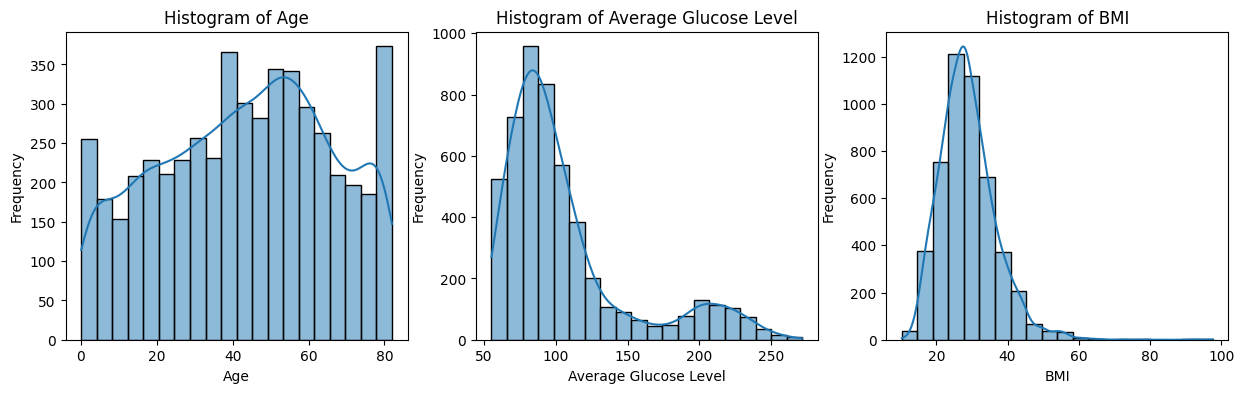

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 구간 변수들의 히스토그램 그리기
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 'age' 변수에 대한 히스토그램 그리기
sns.histplot(ax=axes[0], data=df, x="age", kde=True, bins=20)
# kde=True는 밀도 그래프를 함께 그릴 것을 나타냄. (밀도 그래프는 히스토그램의 분포를 부드럽게 표현)
# bins=20은 히스토그램의 막대 개수
axes[0].set_title("Histogram of Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# 'avg_glucose_level' 변수에 대한 히스토그램 그리기
sns.histplot(ax=axes[1], data=df, x="avg_glucose_level", kde=True, bins=20)
# 'avg_glucose_level' 변수에 대한 히스토그램을 그리
axes[1].set_title("Histogram of Average Glucose Level")
axes[1].set_xlabel("Average Glucose Level")
axes[1].set_ylabel("Frequency")

# 'bmi' 변수에 대한 히스토그램 그리기
sns.histplot(ax=axes[2], data=df, x="bmi", kde=True, bins=20)
# 'bmi' 변수에 대한 히스토그램을 그립니다.
axes[2].set_title("Histogram of BMI")
axes[2].set_xlabel("BMI")
axes[2].set_ylabel("Frequency")

plt.show()

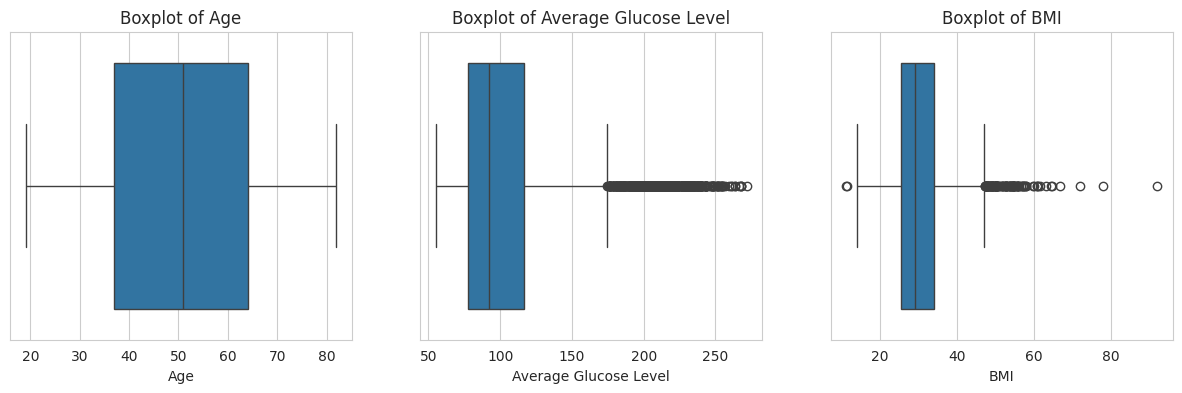

In [19]:
# 상자그램 그리기
sns.set_style('whitegrid')

# 1행 3열의 서브플롯을 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 첫 번째 서브플롯에 'age' 변수에 대한 상자그림을 그림
sns.boxplot(ax=axes[0], x='age', data=df1)
axes[0].set_title("Boxplot of Age")
axes[0].set_xlabel("Age")

# 두 번째 서브플롯에 'avg_glucose_level' 변수에 대한 상자그림을 그림
sns.boxplot(ax=axes[1], x='avg_glucose_level', data=df1)
axes[1].set_title("Boxplot of Average Glucose Level")
axes[1].set_xlabel("Average Glucose Level")

# 세 번째 서브플롯에 'bmi' 변수에 대한 상자그림을 그림
sns.boxplot(ax=axes[2], x='bmi', data=df1)
axes[2].set_title("Boxplot of BMI")
axes[2].set_xlabel("BMI")

plt.show()

In [20]:
# 데이터프레임(df1)에서 'age', 'avg_glucose_level', 'bmi' 세 가지 변수의 1사분위수(Q1)를 계산
Q1 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)

# 데이터프레임(df1)에서 'age', 'avg_glucose_level', 'bmi' 세 가지 변수의 3사분위수(Q3)를 계산
Q3 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)

# 사분위수 범위(IQR)를 계산합니다. IQR은 Q3에서 Q1을 뺀 값으로서, 데이터의 중간 50%의 범위를 나타냄
IQR = Q3 - Q1

print(IQR)

age                 27.00
avg_glucose_level   38.80
bmi                  8.70
dtype: float64


In [21]:
# 이상치를 식별하기 위해 사분위수 범위를 사용하여 하한값(Lower)을 계산
Lower = Q1 - 3.0 * IQR

# 이상치를 식별하기 위해 사분위수 범위를 사용하여 상한값(Upper)을 계산
Upper = Q3 + 3.0 * IQR

print(Lower)
print(Upper)

age                 -44.00
avg_glucose_level   -38.99
bmi                  -0.60
dtype: float64
age                 145.00
avg_glucose_level   232.64
bmi                  60.30
dtype: float64


In [22]:
# 'avg_glucose_level'이 232.64 이하인지를 확인하는 조건을 변수 c1에 할당
c1 = df1['avg_glucose_level'] <= 232.64

# 'bmi'가 60.3 이하인지를 확인하는 조건을 변수 c2에 할당
c2 = df1['bmi'] <= 60.3

# 변수 c1과 c2를 동시에 만족하는 데이터를 필터링하여 새로운 데이터프레임(df2)을 생성
df2 = df1[c1 & c2]

print(df2.shape)

(3915, 12)


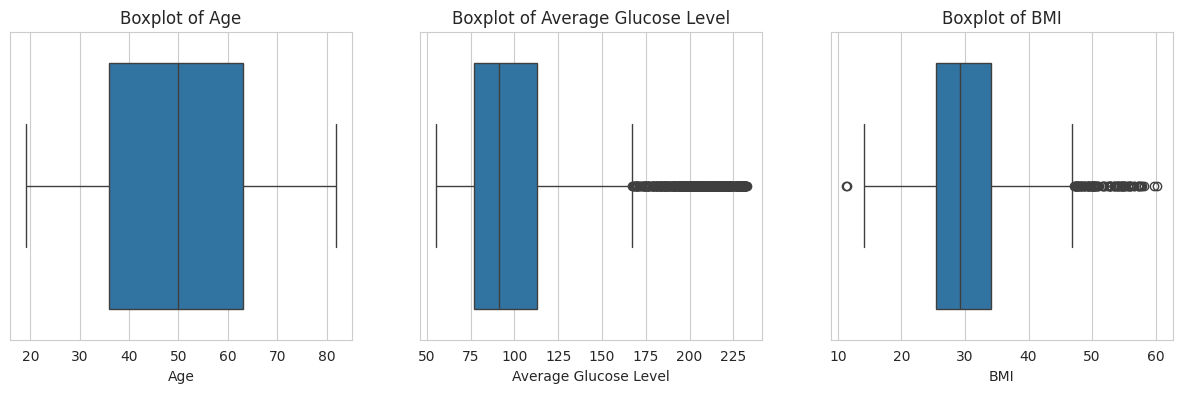

In [23]:
# 1행 3열의 서브플롯을 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 첫 번째 서브플롯에 'age' 변수에 대한 상자그림
sns.boxplot(ax=axes[0], x='age', data=df2)
axes[0].set_title("Boxplot of Age")
axes[0].set_xlabel("Age")

# 두 번째 서브플롯에 'avg_glucose_level' 변수에 대한 상자그림
sns.boxplot(ax=axes[1], x='avg_glucose_level', data=df2)
axes[1].set_title("Boxplot of Average Glucose Level")
axes[1].set_xlabel("Average Glucose Level")

# 세 번째 서브플롯에 'bmi' 변수에 대한 상자그림
sns.boxplot(ax=axes[2], x='bmi', data=df2)
axes[2].set_title("Boxplot of BMI")
axes[2].set_xlabel("BMI")

plt.show()

## 9. 상관관계 검토

▶Orange3

<image src="https://github.com/silverpoodle/data-analysis_python/assets/88484476/f7d54195-f2c2-49c6-87b6-7f26682a1f2a" width="700"/>




> **상관계수**는 두 변수 간의 선형적인 관계의 강도와 방향을 나타내는 수치

> 일반적으로 상관계수는 -1부터 1까지의 값을 가지며, 다음과 같이 해석:
>
> 1에 가까울수록 양의 상관관계. 이는 한 변수가 증가할 때 다른 변수도 증가하는 경향
>
> -1에 가까울수록 음의 상관관계. 이는 한 변수가 증가할 때 다른 변수가 감소하는 경향
>
> 0에 가까울수록 두 변수 간의 선형적인 관계가 없음



In [24]:
# 구간 변수를 cols 리스트에 저장
cols = ['age', 'avg_glucose_level', 'bmi']

# 주어진 변수들 간의 상관계수를 계산
correlation_matrix = df2[cols].corr()

# 상관계수 행렬을 소수점 둘째 자리까지 반올림하여 표시
rounded_correlation_matrix = round(correlation_matrix, 2)

print(rounded_correlation_matrix)

                   age  avg_glucose_level  bmi
age               1.00               0.20 0.02
avg_glucose_level 0.20               1.00 0.16
bmi               0.02               0.16 1.00


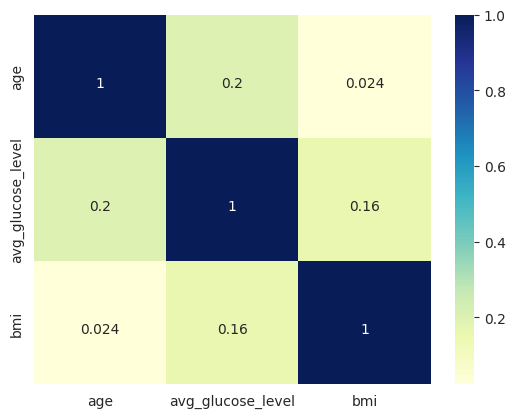

In [25]:
# 주어진 변수들 간의 상관계수를 계산
corr = df2[cols].corr()

# heatmap을 그리기 위한 추가적인 옵션으로, 히트맵 안에 상관계수 값을 표시할 때의 텍스트 정렬을 설정
# 텍스트의 가로 정렬이 중앙에 위치
# 텍스트의 세로 정렬이 상단에 위치
annot_kws = {"ha": 'center', "va": 'top'}

# seaborn 라이브러리의 heatmap 함수를 사용하여 상관계수 히트맵
# annot=True로 설정하면 상관계수 값을 히트맵 안에 표시합
# annot_kws 옵션으로 표시된 텍스트의 가로 정렬(ha)은 'center'로, 세로 정렬(va)은 'top'으로 설정
# cmap 옵션으로는 컬러맵을 선택할 수 있습니다. 여기서는 'YlGnBu'를 사용합니다.
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu")

plt.show()

In [26]:
# 데이터프레임(df2)을 CSV 파일로 저장
# index=False로 설정하여 인덱스를 저장하지 않도록
df2.to_csv('/content/drive/MyDrive/data-analysis/data-csv/healthcare-dataset-2.csv', index=False)

## 10. t-검정


▶Orange3

<image src="https://github.com/silverpoodle/data-analysis_python/assets/88484476/4f946708-3e91-4294-a36e-3634ddffaff4" width="400"/>




> 두 집단 간의 **평균 차이가 통계적으로 유의미한지**를 검정하는 통계적 방법

> 일반적으로 상관계수는 -1부터 1까지의 값을 가지며, 다음과 같이 해석:
>
> 전제조건:
> - 데이터가 정규 분포를 따라야 함
> - 두 그룹은 서로 독립적
> - 연속형 구간변수여야

> **귀무가설**: 일반적으로 p-value가 0.05보다 작으면 유의미한 결과로 간주

> **E-notation**:
>
> <image src="https://github.com/silverpoodle/data-analysis_python/assets/88484476/952c6686-6b9d-44a5-83ff-9f44d4416798" width="400"/>

In [28]:
from scipy import stats

# 'stroke'가 1인 그룹의 'age' 데이터를 추출하여 data_1에 저장
data_1 = df2[df2['stroke'] == 1]['age']

# 'stroke'가 0인 그룹의 'age' 데이터를 추출하여 data_0에 저장
data_0 = df2[df2['stroke'] == 0]['age']

# stats.ttest_ind 함수를 사용하여 두 그룹 간의 독립 표본 t-검정을 수행
# ttest_ind 함수는 두 개의 배열 또는 데이터프레임 컬럼을 인자로 받아 독립 표본 t-검정을 수행
# 여기서는 'stroke'가 1인 그룹과 'stroke'가 0인 그룹 간의 'age' 변수에 대한 t-검정을 수행
# 결과는 t-value와 p-value가 반환
result = stats.ttest_ind(data_1, data_0)

# t-검정의 결과로 나온 p-value를 해석
# 일반적으로 p-value가 0.05보다 작으면 유의미한 차이가 있다고 판단
print(result)

TtestResult(statistic=14.84966867789424, pvalue=1.4355395712390346e-48, df=3913.0)


In [30]:
# 'stroke'가 1인 그룹의 'avg_glucose_level' 데이터를 추출하여 data_1에 저장
data_1 = df2[df2['stroke'] == 1]['avg_glucose_level']

# 'stroke'가 0인 그룹의 'avg_glucose_level' 데이터를 추출하여 data_0에 저장
data_0 = df2[df2['stroke'] == 0]['avg_glucose_level']

# stats.ttest_ind 함수를 사용하여 두 그룹 간의 독립 표본 t-검정을 수행
# ttest_ind 함수는 두 개의 배열 또는 데이터프레임 컬럼을 인자로 받아 독립 표본 t-검정을 수행
# 여기서는 'stroke'가 1인 그룹과 'stroke'가 0인 그룹 간의 'avg_glucose_level' 변수에 대한 t-검정을 수행
# 결과는 t-value와 p-value가 반환
result = stats.ttest_ind(data_1, data_0)
print(result)

TtestResult(statistic=7.200791069659755, pvalue=7.144119062259364e-13, df=3913.0)


In [31]:
data_1 = df2[df2['stroke'] == 1]['bmi']
data_0 = df2[df2['stroke'] == 0]['bmi']

result = stats.ttest_ind(data_1, data_0)
print(result)

TtestResult(statistic=-0.4281061240071263, pvalue=0.6685974193789274, df=3913.0)
